In [1]:
words = open('names.txt', 'r').read().splitlines()

In [2]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [4]:
min(len(w) for w in words)

2

In [5]:
b = {}
for w in words:
    chs = ['<S>'] + list(w) + ['<E>']
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1
        # print(ch1, ch2)

In [6]:
sorted(b.items(), key= lambda kv: kv[1])

[(('q', 'r'), 1),
 (('d', 'z'), 1),
 (('p', 'j'), 1),
 (('q', 'l'), 1),
 (('p', 'f'), 1),
 (('q', 'e'), 1),
 (('b', 'c'), 1),
 (('c', 'd'), 1),
 (('m', 'f'), 1),
 (('p', 'n'), 1),
 (('w', 'b'), 1),
 (('p', 'c'), 1),
 (('h', 'p'), 1),
 (('f', 'h'), 1),
 (('b', 'j'), 1),
 (('f', 'g'), 1),
 (('z', 'g'), 1),
 (('c', 'p'), 1),
 (('p', 'k'), 1),
 (('p', 'm'), 1),
 (('x', 'n'), 1),
 (('s', 'q'), 1),
 (('k', 'f'), 1),
 (('m', 'k'), 1),
 (('x', 'h'), 1),
 (('g', 'f'), 1),
 (('v', 'b'), 1),
 (('j', 'p'), 1),
 (('g', 'z'), 1),
 (('v', 'd'), 1),
 (('d', 'b'), 1),
 (('v', 'h'), 1),
 (('h', 'h'), 1),
 (('g', 'v'), 1),
 (('d', 'q'), 1),
 (('x', 'b'), 1),
 (('w', 'z'), 1),
 (('h', 'q'), 1),
 (('j', 'b'), 1),
 (('x', 'm'), 1),
 (('w', 'g'), 1),
 (('t', 'b'), 1),
 (('z', 'x'), 1),
 (('p', 'b'), 2),
 (('t', 'g'), 2),
 (('q', 's'), 2),
 (('t', 'x'), 2),
 (('f', 'k'), 2),
 (('b', 't'), 2),
 (('j', 'n'), 2),
 (('k', 'c'), 2),
 (('z', 'k'), 2),
 (('s', 'j'), 2),
 (('s', 'f'), 2),
 (('z', 'j'), 2),
 (('n', 'q

More efficient way to usa 2d matrix rather than dictionary for character pair counting
Use pytorch

In [7]:
import torch

In [8]:
N = torch.zeros((27,27), dtype=torch.int32)

In [9]:
# ''.join(words) can cancatenate all the words into a massive string--> the entire dataset as a single string
# pass string into set() constructure, can throw out duplicates because set do not allowed duplicates
# put set into list and sort the list
# set(''.join(words))
chars = sorted(list(set(''.join(words))))

In [10]:
# create lookup table
# stoi means string to integer
# enumerate means iterator over the integer index and the actual element of the list,so we can mapping the character to the integer
# due to '.' occupy 0 index, stoi iterater should 
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}


In [11]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        N[ix1, ix2] += 1

(-0.5, 26.5, 26.5, -0.5)

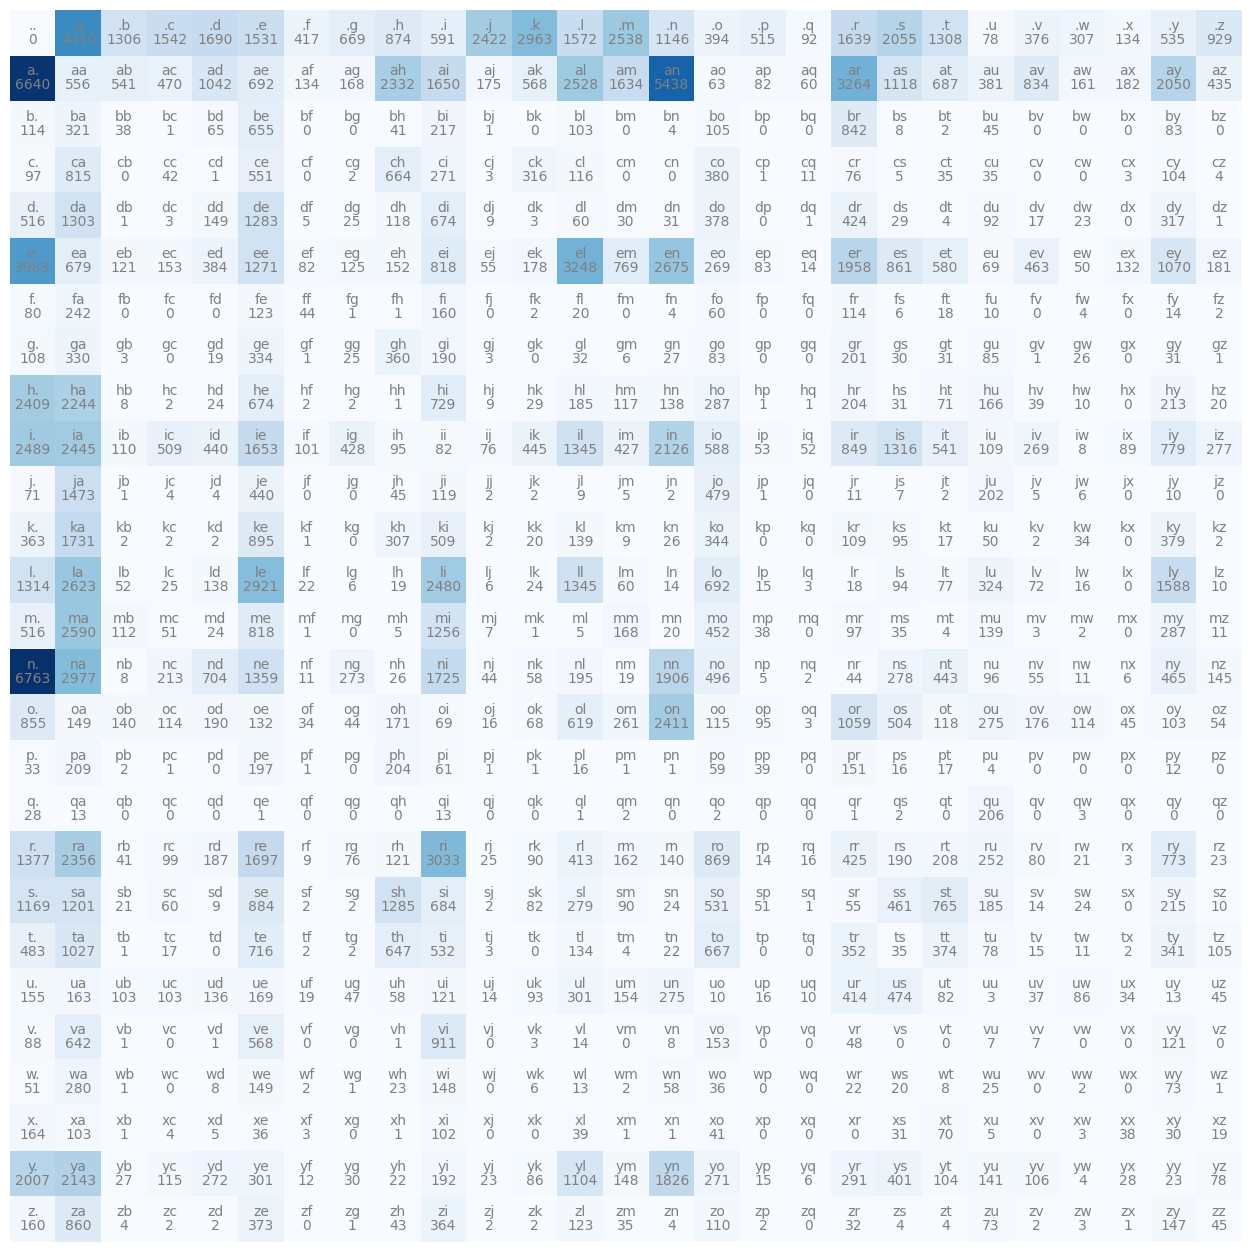

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')


In [13]:
P = N.float() # turn N values into float, and assign to P matrix, P.shape is [27, 27]
# P.sum(0/1, keepdim=True), 0 or 1 contributes to sum by col direction or row direction
# Keepdim = true contributes to the array size after sum(), if true, size[27, 1], if false, size[27]
# P/P.sum(), manipulate [27, 27] / [27, 1], this will work by broadcasting, the [27, 1] will copy into [27, 27]
# broad casting rule: align right --> check dimention --> if dimention not exist, create 1
# eg: # [27, 27] vs [27] --> [27, 27] vs [1, 27](right align and create)
P /= P.sum(1, keepdim=True)


In [14]:
g = torch.Generator().manual_seed(2147483647)

for i in range(20):
    out = [] # claim a arraylist
    ix = 0
    while True:
        p = P[ix]
        # p = N[ix].float()
        # p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix]) #append element into the list
        # print(itos[ix])
        if ix == 0:
            break
    print(''.join(out)) #concatenate the list elements into a string

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.
dedainrwieta.
ssonielylarte.
faveumerifontume.
phynslenaruani.
core.
yaenon.
ka.
jabdinerimikimaynin.
anaasn.
ssorionsush.


# Goal: maximize likelihood of the data with respect to model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average of negative log likelihood
# log(a*b*c) = log(a) + log(b) + log(c)

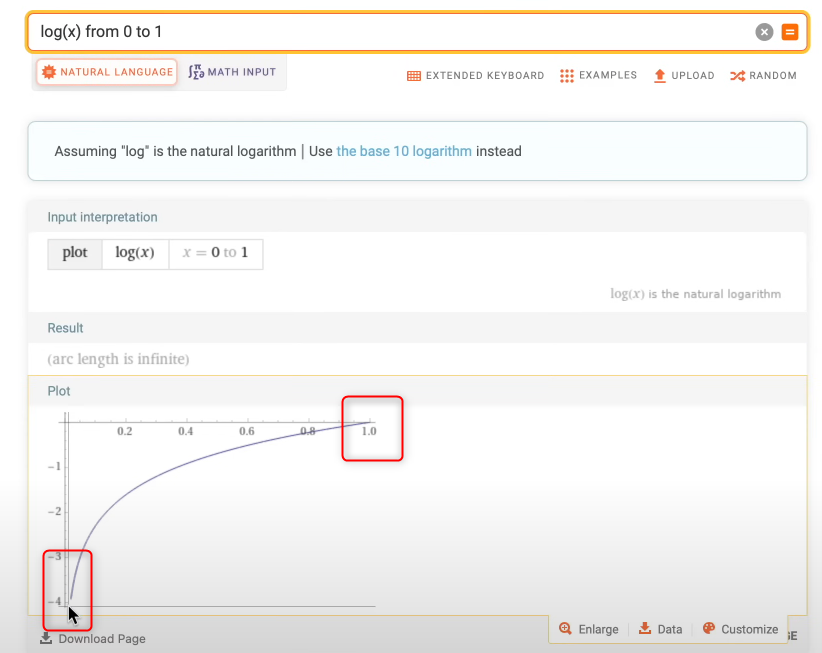

In [15]:
log_likelihood = 0.0
n = 0
for w in words[:3]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        n +=1
        logprob = torch.log(prob)
        log_likelihood += logprob # log(a*b*c) = log(a) + log(b) + log(c)
        print(f'{ch1}{ch2}:  {prob:.4f}  {logprob:.4f}')
print(f'{log_likelihood = }')
nll = -log_likelihood # due to we want loss value high when prob low, we need positive value for loss presentation
print(f'{nll = }')
print(f'{nll/n}') # use average rather than sum to more conviently present loss level, lower loss means more accuracy

.e:  0.0478  -3.0408
em:  0.0377  -3.2793
mm:  0.0253  -3.6772
ma:  0.3899  -0.9418
a.:  0.1960  -1.6299
.o:  0.0123  -4.3982
ol:  0.0780  -2.5508
li:  0.1777  -1.7278
iv:  0.0152  -4.1867
vi:  0.3541  -1.0383
ia:  0.1381  -1.9796
a.:  0.1960  -1.6299
.a:  0.1377  -1.9829
av:  0.0246  -3.7045
va:  0.2495  -1.3882
a.:  0.1960  -1.6299
log_likelihood = tensor(-38.7856)
nll = tensor(38.7856)
2.424102306365967


If not trained, due to 27 possibilities for each case, the pron should be 1/27 = 0.037, 
any prob value above 1/27 means learned something
an expected good model is the prob near 1
use likelihood for model quality judgement, to product all the probs, training target is the product result as high as possible
but product of probs will be a very small value due to all probs are within 1
so use log product for accessment model quality
log plot shape as below, when the product near 0, the log approach negative infinety, when product near 1, log approach 0
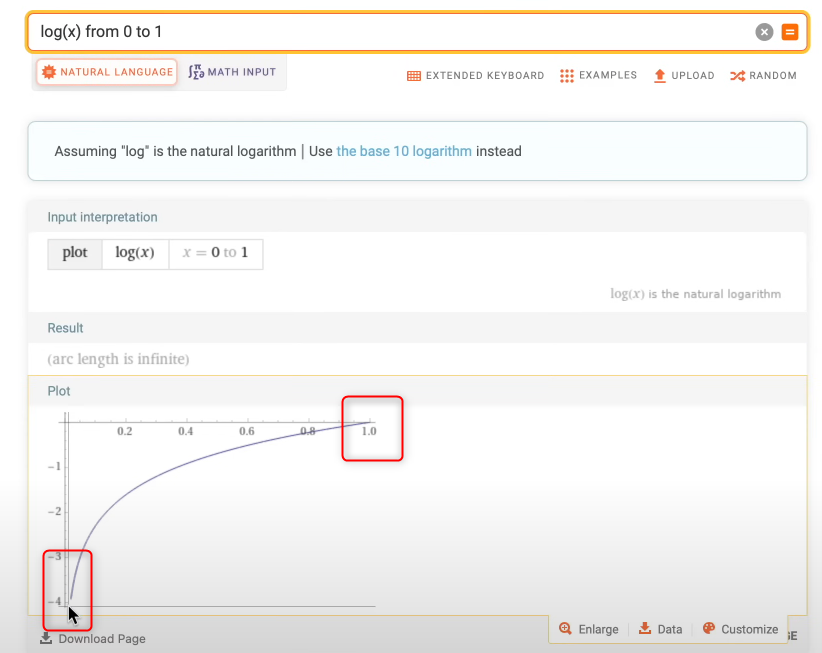



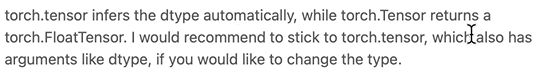

In [16]:
#  here start another method to get the similar model result in a different way
#  create the training set of bigram(x,y)

xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [17]:
xs

tensor([ 0,  5, 13, 13,  1])

In [18]:
ys

tensor([ 5, 13, 13,  1,  0])

In [20]:
#  one hot encoding
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc


tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0]])

In [21]:
xenc.shape

torch.Size([5, 27])

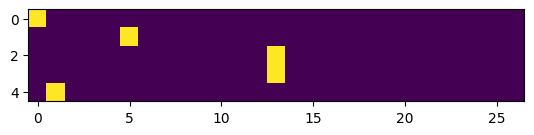

In [22]:
plt.imshow(xenc)

torch.randn((27, 1)) --> normal distribution
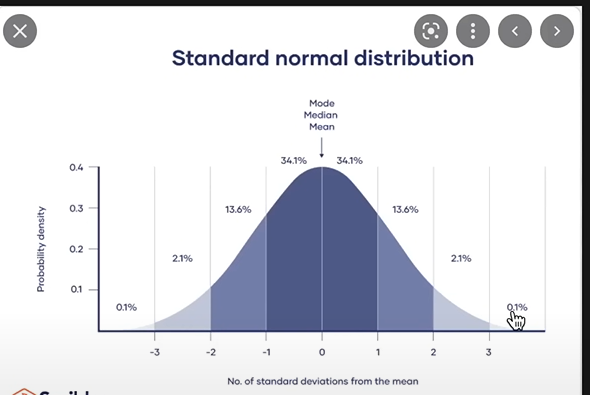